In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_feather('../data/filtered.feather')

In [3]:
map_categories = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != 'SG_UF_PROVA':
        col = df[column].astype('category')
        map_categories[column] = col.cat.categories
        df[column] = col.cat.codes

In [4]:
df.to_feather('../data/filtered_cat.feather')

Vamos observar as notas

In [5]:
df['NU_NOTA'].describe()

count    797357.000000
mean        556.212060
std          95.411663
min         248.300000
25%         487.120000
50%         550.180000
75%         622.240000
max         850.400000
Name: NU_NOTA, dtype: float64

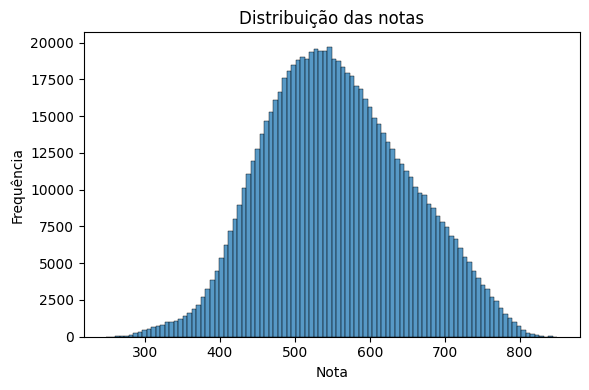

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(df['NU_NOTA'], bins=100)
plt.title('Distribuição das notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.tight_layout()
plt.savefig('images/hist_nota.png')
plt.show()

Vamos observar as notas por estado

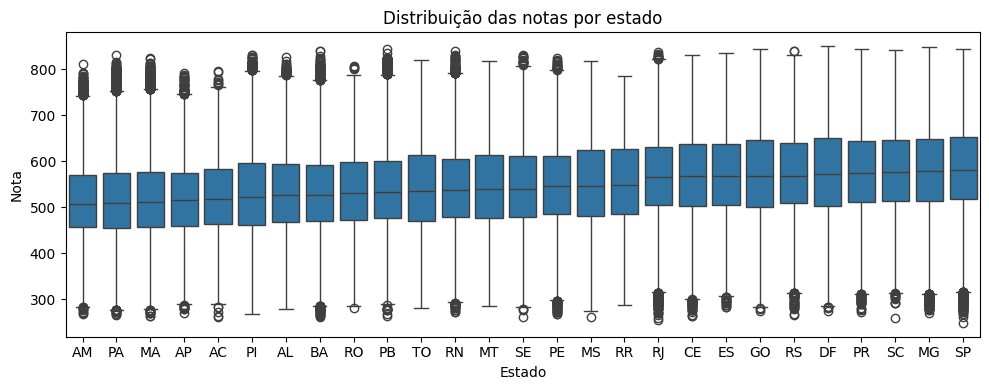

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='SG_UF_PROVA', y='NU_NOTA', data=df, ax=ax, order=df.groupby('SG_UF_PROVA')['NU_NOTA'].median().sort_values(ascending=True).index)
plt.title('Distribuição das notas por estado')
plt.ylabel('Nota')
plt.xlabel('Estado')
plt.tight_layout()
plt.savefig('images/dist_estado.png')
plt.show()

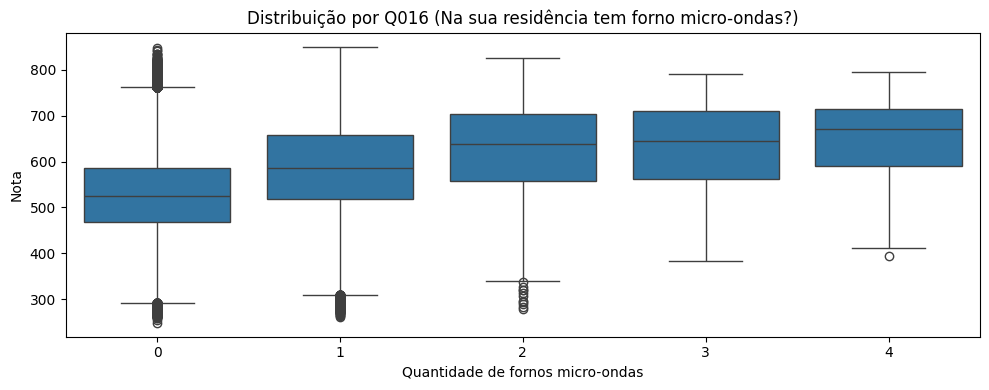

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x='Q016', y='NU_NOTA', data=df, ax=ax)
plt.title('Distribuição por Q016 (Na sua residência tem forno micro-ondas?)')
plt.ylabel('Nota')
plt.xlabel('Quantidade de fornos micro-ondas')
plt.tight_layout()
plt.savefig('images/dist_micro_ondas.png')
plt.show()

Vamos considerar primeiro a nível de Brasil para depois considerar a nível de estados.

In [9]:
df_brasil = df.drop(columns=['SG_UF_PROVA'])

In [10]:
total_cols = list(df_brasil.columns)
total_cols.remove('NU_NOTA')

use_cols = [total_cols[0]]

last_aic = np.inf

for column in total_cols[1:]:
    model = sm.OLS(df_brasil['NU_NOTA'], sm.add_constant(df_brasil[use_cols + [column]]))
    model_fit = model.fit()

    if model_fit.aic < last_aic:
        use_cols.append(column)
        last_aic = model_fit.aic

In [11]:
set(total_cols) - set(use_cols)

set()

In [12]:
full_model = pd.read_csv('../data/full_model.csv')
full_model.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
full_model

,feature,Estimate,Std. Error,t value,Pr(>|t|)
0,(Intercept),473.667161,0.513735,922.006512,0.000000e+00
1,Q001,4.019759,0.074311,54.093809,0.000000e+00
2,Q002,6.200354,0.075916,81.674138,0.000000e+00
3,Q003,5.522235,0.103873,53.163551,0.000000e+00
4,Q004,3.870454,0.110185,35.126817,4.235177e-270
5,Q005,-5.514095,0.068892,-80.039679,0.000000e+00
6,Q006,5.942969,0.042387,140.207210,0.000000e+00
7,Q007,-5.617735,0.205956,-27.276370,9.626643e-164
8,Q008,6.839561,0.167659,40.794534,0.000000e+00
9,Q010,2.671090,0.174662,15.292876,8.678630e-53


In [13]:
intercept_model = pd.read_csv('../data/intercept_model.csv')
intercept_model.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
intercept_model

,feature,Estimate,Std. Error,t value
0,(Intercept),470.214292,2.285368,205.749914
1,Q001,4.240376,0.073788,57.466986
2,Q002,6.438274,0.075450,85.331109
3,Q003,5.524446,0.103105,53.580946
4,Q004,3.783756,0.109307,34.615766
5,Q005,-5.050988,0.069033,-73.167962
6,Q006,6.037249,0.042144,143.252599
7,Q007,-5.513396,0.204687,-26.935687
8,Q008,6.015866,0.168433,35.716761
9,Q010,2.407930,0.175401,13.728179


In [14]:
compare_models = pd.merge(
    intercept_model[['feature', 'Estimate']].rename(columns={'Estimate': 'coef_intercept_model'}),
    full_model[['feature', 'Estimate']].rename(columns={'Estimate': 'coef_full_model'}),
    on='feature',
    how='outer'
)
compare_models.to_csv('../data/compare_models.csv', index=False, float_format='%.2f')
compare_models

,feature,coef_intercept_model,coef_full_model
0,(Intercept),470.214292,473.667161
1,Q001,4.240376,4.019759
2,Q002,6.438274,6.200354
3,Q003,5.524446,5.522235
4,Q004,3.783756,3.870454
5,Q005,-5.050988,-5.514095
6,Q006,6.037249,5.942969
7,Q007,-5.513396,-5.617735
8,Q008,6.015866,6.839561
9,Q010,2.407930,2.671090


In [15]:
uf_effect = pd.read_csv('../data/uf_effect.csv')
uf_effect.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
uf_effect

,feature,(Intercept)
0,AC,-7.346619
1,AL,1.170948
2,AM,-17.948002
3,AP,-15.893599
4,BA,-0.148544
5,CE,31.929771
6,DF,-3.715718
7,ES,7.428981
8,GO,8.411292
9,MA,-5.873150


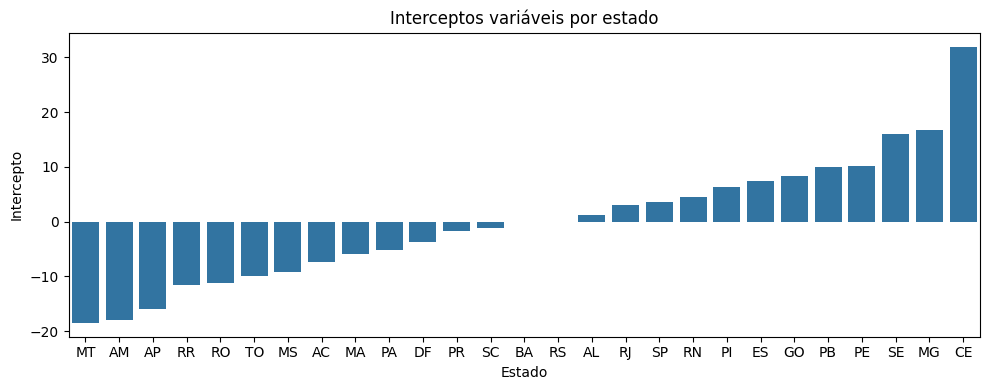

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='feature', y='(Intercept)', data=uf_effect, ax=ax, order=uf_effect.sort_values('(Intercept)', ascending=True)['feature'])
plt.title('Interceptos variáveis por estado')
plt.ylabel('Intercepto')
plt.xlabel('Estado')
plt.tight_layout()
plt.savefig('images/intercept_estado.png')
plt.show()